In [1]:
#import library for analysis
import pandas as pd
#WordNetLemmatizer for reducing inflection in words to their root form
from nltk.stem import WordNetLemmatizer
#stopwords 
from nltk.corpus import stopwords
#splits a string using a regular expression
from nltk.tokenize import RegexpTokenizer
import string

In [2]:
#assigning stop words (english library) to variable
sw = stopwords.words('english')

In [6]:
#read raw GA report
data = pd.read_excel('/users/mzimmermann/Documents/Work/ANZ_search_terms/dna_search_report/c_lens_anz.xlsx')
data.head(10)

,Search Term,Search Results Number (cd72),Total Unique Searches
0,afterpay,0,16
1,sample,1,16
2,template,0,14
3,resolution,0,11
4,stickers,0,11
5,login,0,10
6,flyers,0,10
7,bleed,1,10
8,background colour,1,9
9,size,1,9


In [7]:
# cols lower case and spaces repalced with underscore
cols = []
for i in range(len(data.columns)):
    cols.append(data.columns[i].lower().replace(' ','_'))
data.columns = cols

In [8]:
#selecting only search terms col
df = data.iloc[:, 0]
df

0              afterpay
1                sample
2              template
3            resolution
4              stickers
             ...       
766      offline editor
767     payment details
768            referral
769    use design again
770           wholesale
Name: search_term, Length: 771, dtype: object

In [9]:
#function to remove punctuation from search terms ('.', ',' ect)
def remove_punctuation(text):
    no_punct = ''.join([c for c in text if c not in string.punctuation])
    return no_punct

In [10]:
#applying function row by row
df = df.apply(lambda x: remove_punctuation(x))
df

0              afterpay
1                sample
2              template
3            resolution
4              stickers
             ...       
766      offline editor
767     payment details
768            referral
769    use design again
770           wholesale
Name: search_term, Length: 771, dtype: object

In [11]:
#split strings
tokenizer = RegexpTokenizer(r'\w+')
df = df.apply(lambda x: tokenizer.tokenize(x.lower()))
df

0                [afterpay]
1                  [sample]
2                [template]
3              [resolution]
4                [stickers]
               ...         
766       [offline, editor]
767      [payment, details]
768              [referral]
769    [use, design, again]
770             [wholesale]
Name: search_term, Length: 771, dtype: object

In [12]:
#function to remove stop words
def remove_stopwords(text):
    words =  [w for w in text if w not in stopwords.words('english')]
    return words

In [13]:
#applying function row by row
df = df.apply(lambda x: remove_stopwords(x))
df

0              [afterpay]
1                [sample]
2              [template]
3            [resolution]
4              [stickers]
              ...        
766     [offline, editor]
767    [payment, details]
768            [referral]
769         [use, design]
770           [wholesale]
Name: search_term, Length: 771, dtype: object

In [14]:
lemmatizer = WordNetLemmatizer()
#function to iterate through the column
def word_lemmatizer(text):
    lem_text = ' '.join([lemmatizer.lemmatize(i) for i in text])
    return lem_text

In [15]:
#lemmatize the word to the word root
df = df.apply(lambda x: word_lemmatizer(x))
df

0            afterpay
1              sample
2            template
3          resolution
4             sticker
            ...      
766    offline editor
767    payment detail
768          referral
769        use design
770         wholesale
Name: search_term, Length: 771, dtype: object

In [16]:
#looping through column and storing values to a list
text = []
for i in df:
    text.append(i)

In [17]:
#creating one string in order to visualize a wordcloud
unique_str = (" ").join(text)

In [18]:
#importing wordcloud for visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt

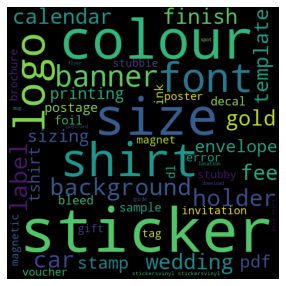

In [19]:
# show 50 words in the wordcloud
wordcloud = WordCloud(width=500, height=500, max_words=50).generate(unique_str)
plt.figure(figsize=(10,5))
# plot the WordCloud image 

plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [20]:
#splitting into multiple strings for barplot visualization
word_list = pd.DataFrame(unique_str.split())
word_list_100 = word_list.value_counts()[word_list.value_counts()>100]

<AxesSubplot:xlabel='0'>

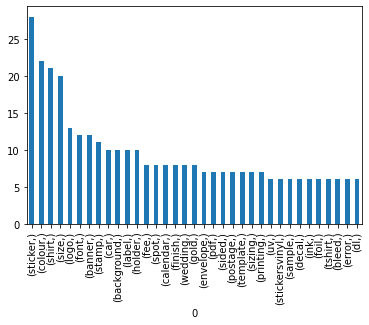

In [27]:
#barplot where count is greater than 5
word_list.value_counts()[word_list.value_counts()>5].plot(kind='bar')

In [28]:
#function to count words
def word_count_func(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

In [29]:
#applying function to the unique_str
word_count = word_count_func(unique_str)

In [30]:
type(word_count)

dict

In [36]:
#converting dict to a dataframe
search_terms = pd.DataFrame(word_count.items())
#renaming columns
search_terms.columns = ['search_term', 'count']
#sorting dataframe decending and reset index
search_terms_ordered = search_terms.sort_values(['count'], ascending=False).reset_index(drop=True)

In [39]:
# filtering search terms with a count > 5
search_terms_ordered[search_terms_ordered['count']>5]

,search_term,count
0,sticker,28
1,colour,22
2,shirt,21
3,size,20
4,logo,13
5,banner,12
6,font,12
7,stamp,11
8,background,10
9,car,10


In [40]:
# saving as excel file
search_terms_ordered[search_terms_ordered['count']>5].to_excel(r'/users/mzimmermann/Documents/Work/ANZ_search_terms/dna_search_report/real_count.xlsx', index=False)

In [41]:
# assigning filtered data frame to variable
df_clean = search_terms_ordered[search_terms_ordered['count']>5]

In [42]:
df_clean

,search_term,count
0,sticker,28
1,colour,22
2,shirt,21
3,size,20
4,logo,13
5,banner,12
6,font,12
7,stamp,11
8,background,10
9,car,10


In [66]:
# test: pulling searches 
data[data['search_term'].str.contains('sticker')].iloc[:,0:2]

,search_term,search_results_number_(cd72)
4,stickers,0
108,sticker,0
147,car stickers,0
190,car sticker,0
191,car stickers large,1
198,clear stickers,0
262,gold foil stickers,0
377,stickers snd labels,0
378,stickers snd lanels,0
404,textured stickers,0


In [62]:
#saving excel files for each search term
data[data['search_term'].str.contains('sticker')].iloc[:,0:2].to_excel(r'/users/mzimmermann/Documents/Work/ANZ_search_terms/dna_search_report/files/sticker.xlsx', index=False)
data[data['search_term'].str.contains('colour')].iloc[:,0:2].to_excel(r'/users/mzimmermann/Documents/Work/ANZ_search_terms/dna_search_report/files/colour.xlsx', index=False)
data[data['search_term'].str.contains('shirt')].iloc[:,0:2].to_excel(r'/users/mzimmermann/Documents/Work/ANZ_search_terms/dna_search_report/files/shirt.xlsx', index=False)
data[data['search_term'].str.contains('size')].iloc[:,0:2].to_excel(r'/users/mzimmermann/Documents/Work/ANZ_search_terms/dna_search_report/files/size.xlsx', index=False)
data[data['search_term'].str.contains('logo')].iloc[:,0:2].to_excel(r'/users/mzimmermann/Documents/Work/ANZ_search_terms/dna_search_report/files/logo.xlsx', index=False)
data[data['search_term'].str.contains('banner')].iloc[:,0:2].to_excel(r'/users/mzimmermann/Documents/Work/ANZ_search_terms/dna_search_report/files/banner.xlsx', index=False)
data[data['search_term'].str.contains('font')].iloc[:,0:2].to_excel(r'/users/mzimmermann/Documents/Work/ANZ_search_terms/dna_search_report/files/font.xlsx', index=False)
data[data['search_term'].str.contains('stamp')].iloc[:,0:2].to_excel(r'/users/mzimmermann/Documents/Work/ANZ_search_terms/dna_search_report/files/stamp.xlsx', index=False)
data[data['search_term'].str.contains('background')].iloc[:,0:2].to_excel(r'/users/mzimmermann/Documents/Work/ANZ_search_terms/dna_search_report/files/background.xlsx', index=False)
data[data['search_term'].str.contains('car')].iloc[:,0:2].to_excel(r'/users/mzimmermann/Documents/Work/ANZ_search_terms/dna_search_report/files/car.xlsx', index=False)
data[data['search_term'].str.contains('label')].iloc[:,0:2].to_excel(r'/users/mzimmermann/Documents/Work/ANZ_search_terms/dna_search_report/files/label.xlsx', index=False)
data[data['search_term'].str.contains('holder')].iloc[:,0:2].to_excel(r'/users/mzimmermann/Documents/Work/ANZ_search_terms/dna_search_report/files/holder.xlsx', index=False)
data[data['search_term'].str.contains('wedding')].iloc[:,0:2].to_excel(r'/users/mzimmermann/Documents/Work/ANZ_search_terms/dna_search_report/files/wedding.xlsx', index=False)
data[data['search_term'].str.contains('calendar')].iloc[:,0:2].to_excel(r'/users/mzimmermann/Documents/Work/ANZ_search_terms/dna_search_report/files/calendar.xlsx', index=False)
data[data['search_term'].str.contains('finish')].iloc[:,0:2].to_excel(r'/users/mzimmermann/Documents/Work/ANZ_search_terms/dna_search_report/files/finish.xlsx', index=False)
data[data['search_term'].str.contains('fee')].iloc[:,0:2].to_excel(r'/users/mzimmermann/Documents/Work/ANZ_search_terms/dna_search_report/files/fee.xlsx', index=False)
data[data['search_term'].str.contains('gold')].iloc[:,0:2].to_excel(r'/users/mzimmermann/Documents/Work/ANZ_search_terms/dna_search_report/files/gold.xlsx', index=False)
data[data['search_term'].str.contains('spot')].iloc[:,0:2].to_excel(r'/users/mzimmermann/Documents/Work/ANZ_search_terms/dna_search_report/files/spot.xlsx', index=False)
